# Project 6: Image Classification with Deep Learning


## Goals

With my available datasets I want to train a model to accurately identify whether an image is a cat or a dog given cat and dog training data
This is a superviseddata problem


In [1]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
url2 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'
url3 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'
url4 = 'https://th.bing.com/th/id/OIP.gf4OjfhgyqE87NR4bCn-zwHaEf?rs=1&pid=ImgDetMain'

## Imports


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import get_file

## Prepare data for splitting


In [3]:
X = pd.read_pickle(url)
# Encode labels: 0 for cat, 1 for dog
y = np.array(pd.read_pickle(url2))

In [4]:
# Confirm data shapes

print(f"X shape: {X.shape}")

print(f"y shape: {y.shape}")

X shape: (24946, 100, 100, 1)
y shape: (24946,)


In [5]:
# Normalize pixel values
X = X / 255.0

## Take a sample of the data


In [6]:
# Calculate the sample size
sample_size = int(0.6 * len(X))

# Generate random indices
random_indices = np.random.choice(len(X), size=sample_size, replace=False)

# Use the random indices to select samples
X = X[random_indices]
y = y[random_indices]

In [7]:
six_images = np.random.choice(len(X), size=6, replace=False)

## Test Splitting


In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,)

## Model Definition


In [9]:
# Define model
input_shape = X.shape[1:]
inputs = Input(shape=input_shape)

x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Data augmentation


In [10]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)

In [11]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=0.00001)

## Train the model


In [12]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=128),
    epochs=5,
    validation_data=(X_test, y_test),   
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/5


/usr/local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5117 - loss: 0.7526

2024-11-25 22:34:56.605086: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 179640000 exceeds 10% of free system memory.


82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.5121 - loss: 0.7521 - val_accuracy: 0.6139 - val_loss: 0.6471 - learning_rate: 0.0010
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.6112 - loss: 0.6582 - val_accuracy: 0.6348 - val_loss: 0.6335 - learning_rate: 0.0010
Epoch 3/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.6147 - loss: 0.6551 - val_accuracy: 0.6700 - val_loss: 0.6120 - learning_rate: 0.0010
Epoch 4/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.6341 - loss: 0.6416 - val_accuracy: 0.6177 - val_loss: 0.6434 - learning_rate: 0.0010
Epoch 5/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.6424 - loss: 0.6375 - val_accuracy: 0.6981 - val_loss: 0.5852 - learning_rate: 0.0010


## Evaluate the model


In [13]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

 24/141 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6896 - loss: 0.5794

2024-11-25 22:35:30.021324: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 179640000 exceeds 10% of free system memory.


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7038 - loss: 0.5789
Test accuracy: 0.70


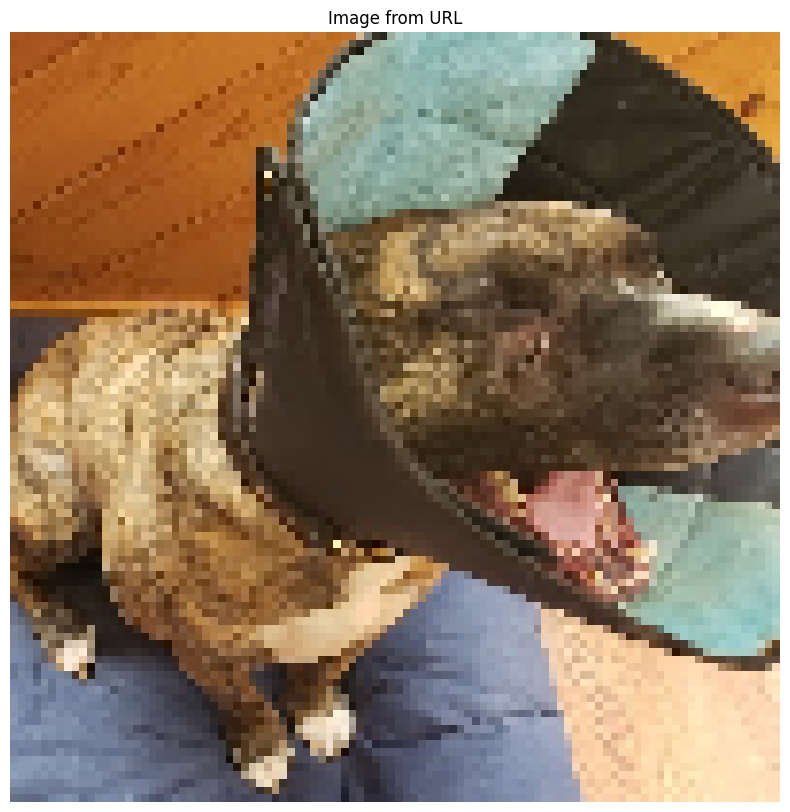

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction: [[0.40215024]]
The image is likely a cat


In [14]:
def show_image_from_url(url):
    img = image.load_img(get_file('temp_image', url), target_size=(X.shape[1], X.shape[2]))
    # Convert the image to a numpy array and normalize
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title("Image from URL")
    plt.axis('off')
    plt.show()

# Use the function
show_image_from_url(url3)

# Load and preprocess the image from url3
img = image.load_img(get_file('temp_image', url3), target_size=(X.shape[1], X.shape[2]))

# Convert the image to a numpy array and normalize
img_array = image.img_to_array(img) / 255.0

# Add a batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Convert to grayscale if necessary
if img_array.shape[-1] == 3:
    img_array = tf.image.rgb_to_grayscale(img_array)

# Make prediction
prediction = model.predict(img_array)

# Print the prediction
print(f"Prediction: {prediction}")

# Interpret the prediction (assuming 0 is cat and 1 is dog)
if prediction[0][0] < 0.5:
    print("The image is likely a cat")
else:
    print("The image is likely a dog")


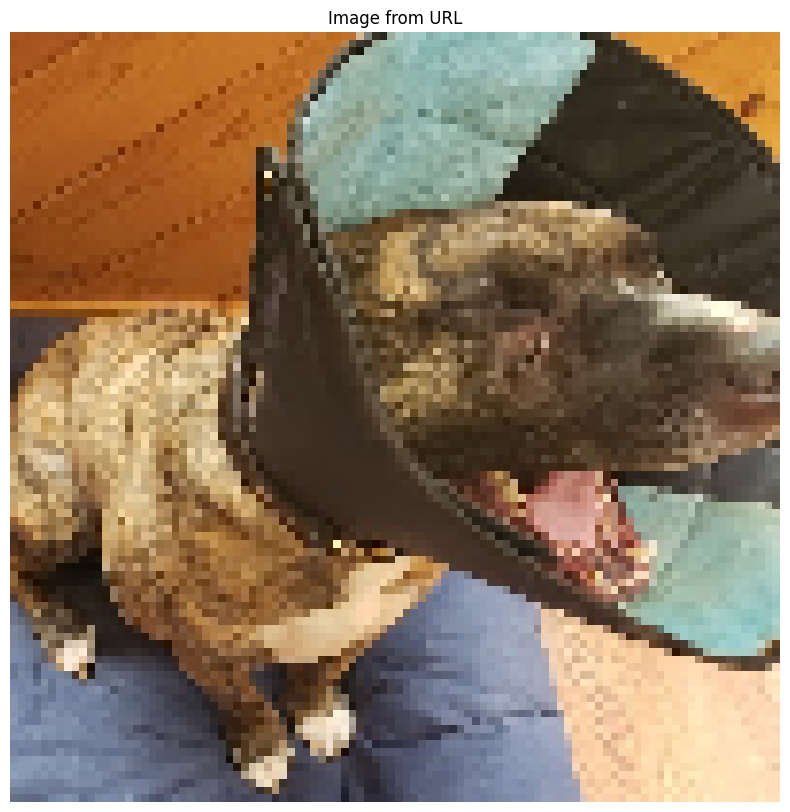

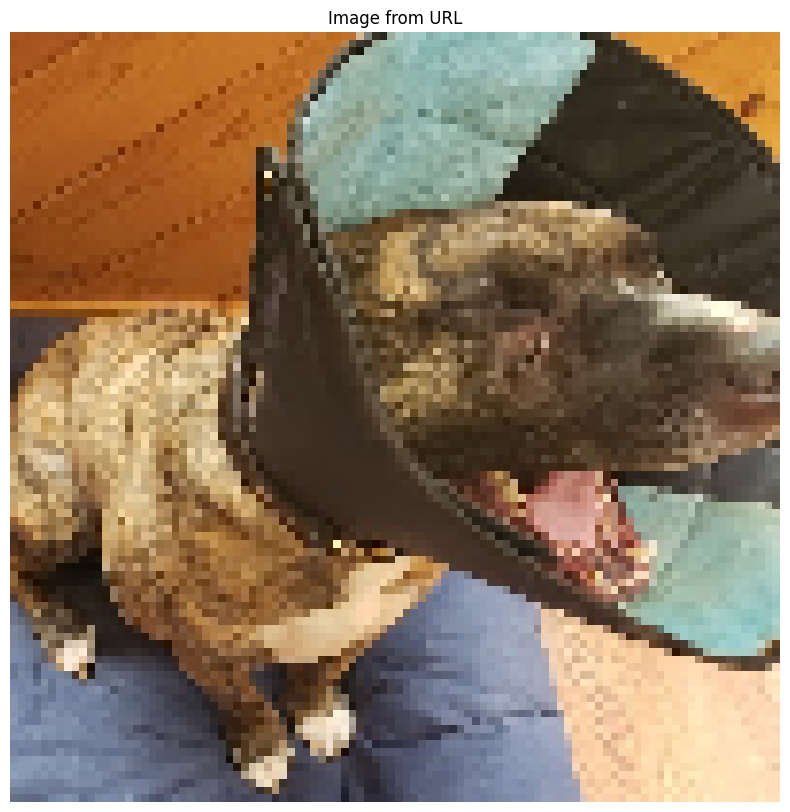

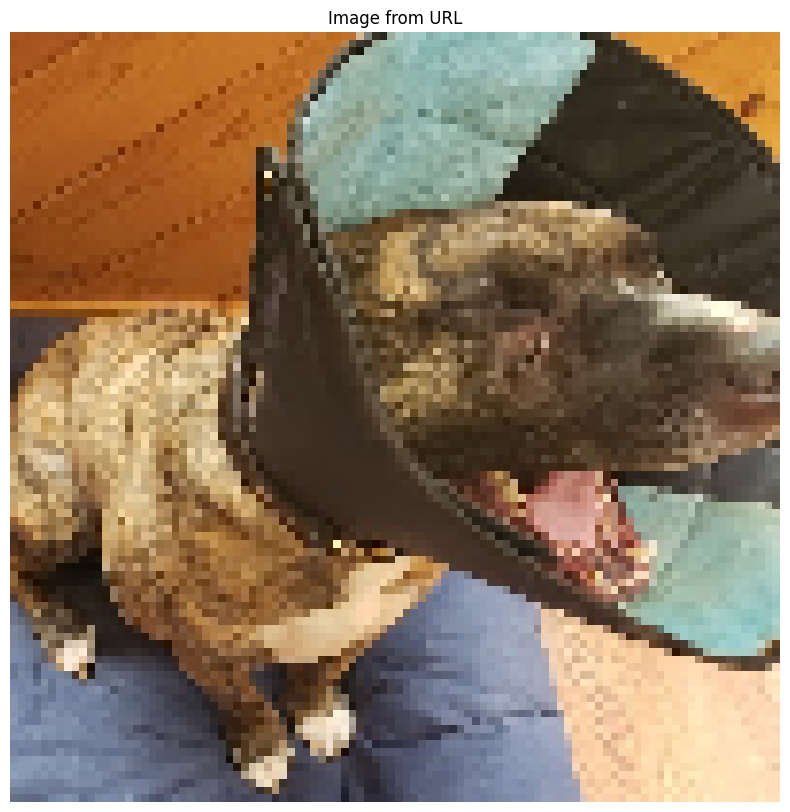

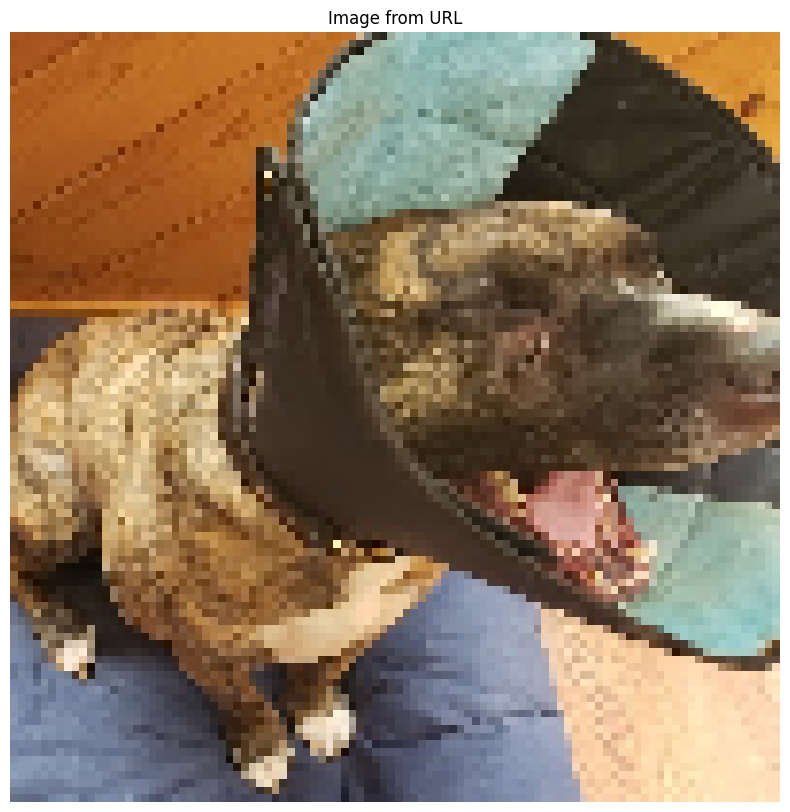

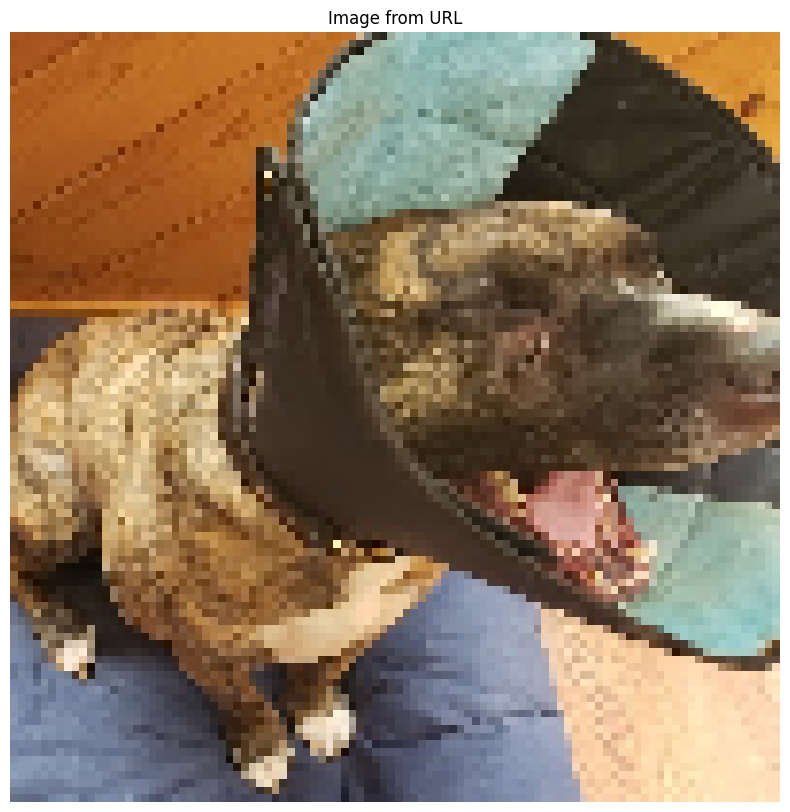

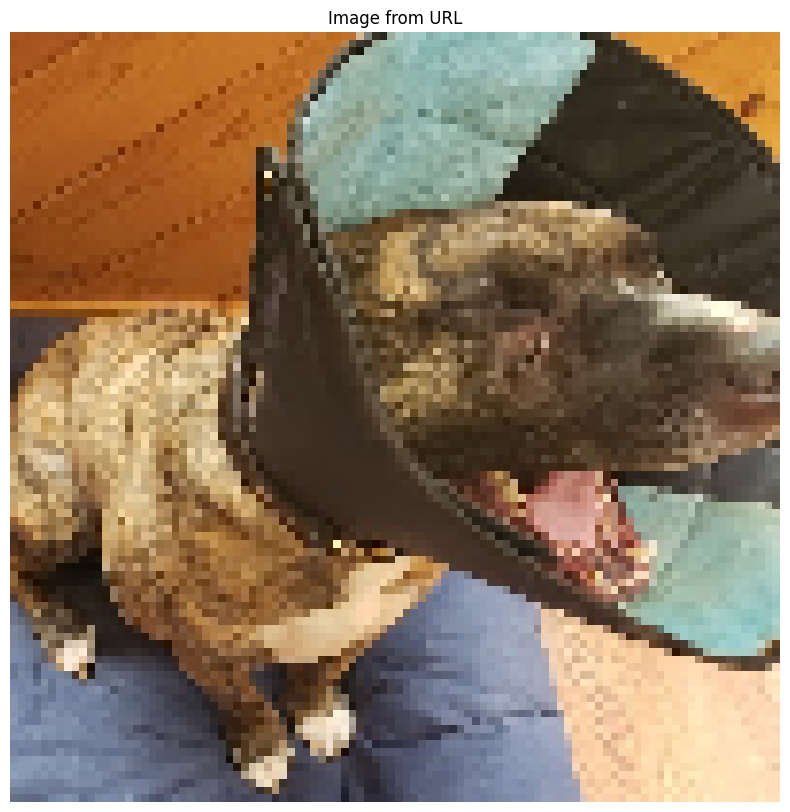

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: [[0.40215024]]
The image is likely a cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediction: [[0.40215024]]
The image is likely a cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction: [[0.40215024]]
The image is likely a cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction: [[0.40215024]]
The image is likely a cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction: [[0.40215024]]
The image is likely a cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediction: [[0.40215024]]
The image is likely a cat


In [21]:
def show_image_from_urls(six_images):
    for image_url in six_images:
        img = image.load_img(get_file('temp_image', image_url), target_size=(X.shape[1], X.shape[2]))
        # Convert the image to a numpy array and normalize

        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.title("Image from URL")
        plt.axis('off')
        plt.show()
# Use the function
show_image_from_urls(six_images)

# Load and preprocess each image in six_images
for image_url in six_images:
    img = image.load_img(get_file('temp_image', image_url), target_size=(X.shape[1], X.shape[2]))

    # Convert the image to a numpy array and normalize
    img_array = image.img_to_array(img) / 255.0

    # Add a batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    # Convert to grayscale if necessary
    if img_array.shape[-1] == 3:
        img_array = tf.image.rgb_to_grayscale(img_array)

    # Make prediction
    prediction = model.predict(img_array)

    # Print the prediction
    print(f"Prediction: {prediction}")

    # Interpret the prediction (assuming 0 is cat and 1 is dog)
    if prediction[0][0] < 0.5:
        print("The image is likely a cat")
    else:
        print("The image is likely a dog")

## Model Accuracy


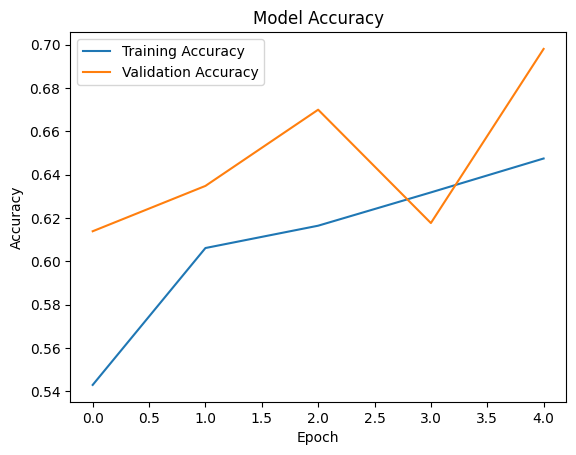

In [16]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Plot training and validation loss


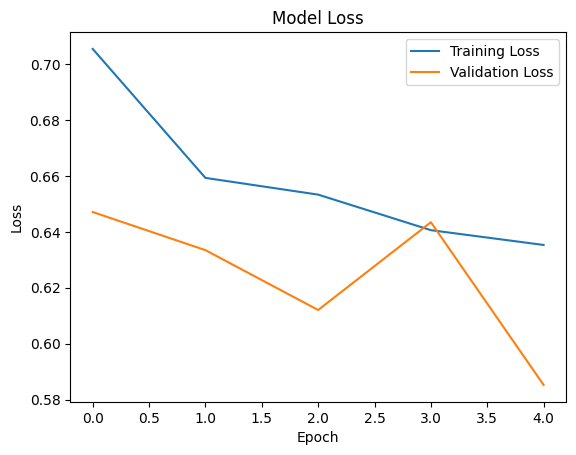

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

 24/141 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

2024-11-25 22:35:31.766319: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 179640000 exceeds 10% of free system memory.


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


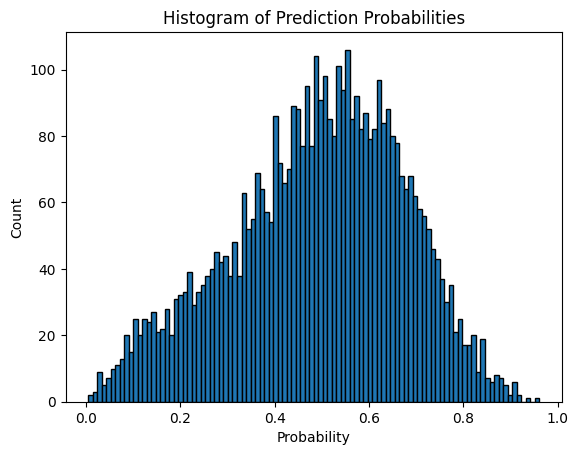

In [18]:
# Get predictions on the test set
test_predictions = model.predict(X_test)

# Plot histogram of probabilities
plt.hist(test_predictions, bins=100, edgecolor='black')
plt.title('Histogram of Prediction Probabilities')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()


In [19]:
def select_images(predictions, images, thresholds=[0.0, 0.5, 1.0], num_per_threshold=6):
    selected_images = []
    for threshold in thresholds:
        closest_indices = np.argsort(np.abs(predictions - threshold))[:num_per_threshold]
        selected_images.extend([images[i] for i in closest_indices])
    return selected_images

# Assuming X_test is your test image data
selected_images = select_images(test_predictions, X_test)


In [20]:
def visualize_selected_images(selected_images, predictions):
    fig, axes = plt.subplots(3, 6, figsize=(20, 10))
    for i, (image, prob) in enumerate(zip(selected_images, predictions)):
        # Reshape the image to remove the extra dimension
        reshaped_image = image.reshape(image.shape[1], image.shape[2], image.shape[3])
        axes[i // 6, i % 6].imshow(reshaped_image)
        axes[i // 6, i % 6].set_title(f'Probability: {prob:.2f}')
        axes[i // 6, i % 6].axis('off')
    plt.tight_layout()
    plt.show()
